In [162]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from utils import *
%load_ext autoreload
%autoreload 2
import random
with open('TSPD.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile, delimiter=';'))
    for item in range(len(data)):
        i = data[item]
        data[item] = [int(i[0]),int(i[1]),int(i[2])]


data = np.array([(0, 0), (1, 2), (2, 4), (3, 1), (7, 3), (2,5), (4,4)]) * 10
NR_NODES = len(data)
HALF_NODES = int(len(data)/2)
print(data)
print(NR_NODES)


matrix, cost_list =  get_dist_matrix_and_cost(data, cost=False)
matrix



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[[ 0  0]
 [10 20]
 [20 40]
 [30 10]
 [70 30]
 [20 50]
 [40 40]]
7


array([[        inf, 22.36067977, 44.72135955, 31.6227766 , 76.15773106,
        53.85164807, 56.56854249],
       [22.36067977,         inf, 22.36067977, 22.36067977, 60.8276253 ,
        31.6227766 , 36.05551275],
       [44.72135955, 22.36067977,         inf, 31.6227766 , 50.99019514,
        10.        , 20.        ],
       [31.6227766 , 22.36067977, 31.6227766 ,         inf, 44.72135955,
        41.23105626, 31.6227766 ],
       [76.15773106, 60.8276253 , 50.99019514, 44.72135955,         inf,
        53.85164807, 31.6227766 ],
       [53.85164807, 31.6227766 , 10.        , 41.23105626, 53.85164807,
                inf, 22.36067977],
       [56.56854249, 36.05551275, 20.        , 31.6227766 , 31.6227766 ,
        22.36067977,         inf]])

In [163]:
def count_cost_diff_cycle(edge, new_n, dist_m):
    start_n = edge[0]
    end_n = edge[1]
    # cost(start-end) + cost(start, new) + cost(end,new) + cost(new)print(distance_matrix[:10][:10])
    cost_diff = - dist_m[start_n][ end_n] + dist_m[start_n][ new_n] + dist_m[new_n][end_n]
    assert cost_diff>0, f'{cost_diff, - dist_m[start_n][ end_n], dist_m[start_n][ new_n], dist_m[new_n][end_n]}'
    return cost_diff

def create_regret_matrix(non_visited, cur_tour, dist_m): #cur_tour = edges
    reg_matrix = np.zeros((len(dist_m),len(cur_tour)))
    for new_node in non_visited:
        for i,edge in enumerate(cur_tour):
            reg_matrix[new_node][i]=count_cost_diff_cycle(edge, new_node, dist_m)
    print("reg_matrix",reg_matrix)
    return reg_matrix

def return_biggest_regret(matrix):
    min_values_for_rows = np.min(matrix, axis=1)
    print("min_values_for_rows",min_values_for_rows)
    rescue_node = np.argmax(min_values_for_rows, axis=0) #najlepiej ratować 4 index
    print("City with bigest regret",rescue_node)
    rescueing_node = np.argmin(matrix[rescue_node])# def return_max_from_min_rows_regret(matrix):
    print("Rescueing edge index to modify: ",rescueing_node)
    return rescue_node, rescueing_node

def add_to_cycle(edge, new_n, dist_m,edges):
    #
    start_n = edge[0]
    end_n = edge[1]
    # cost(start-end) + cost(start, new) + cost(end,new) + cost(new)
    cost_diff = - dist_m[start_n][ end_n] + dist_m[start_n][ new_n] + dist_m[new_n][end_n]
    edges.remove(edge)
    edges.append([start_n, new_n])
    edges.append([new_n, end_n])
    return edges, cost_diff


[0, 1, 2, 3, 4, 5, 6]


/home/zuzabu/projects/tsp/utils.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X, Y, cmap="grey", labels = True)


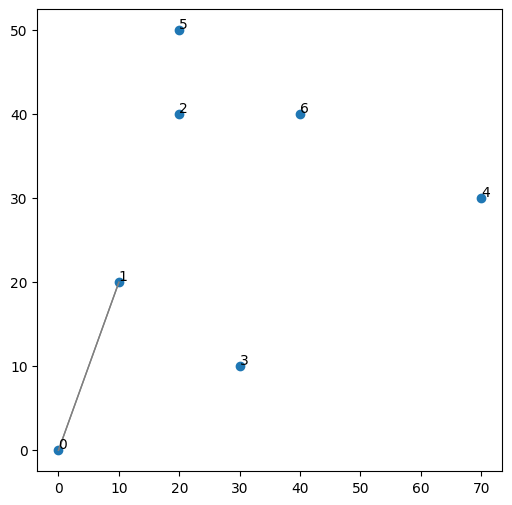

reg_matrix [[  0.           0.        ]
 [  0.           0.        ]
 [ 44.72135955  44.72135955]
 [ 31.6227766   31.6227766 ]
 [114.62467659 114.62467659]
 [ 63.1137449   63.1137449 ]
 [ 70.26337547  70.26337547]]
min_values_for_rows [  0.           0.          44.72135955  31.6227766  114.62467659
  63.1137449   70.26337547]
City with bigest regret 4
Rescueing edge index to modify:  1
real_rescueing_edge (1, 0) [(0, 1), (1, 0)]


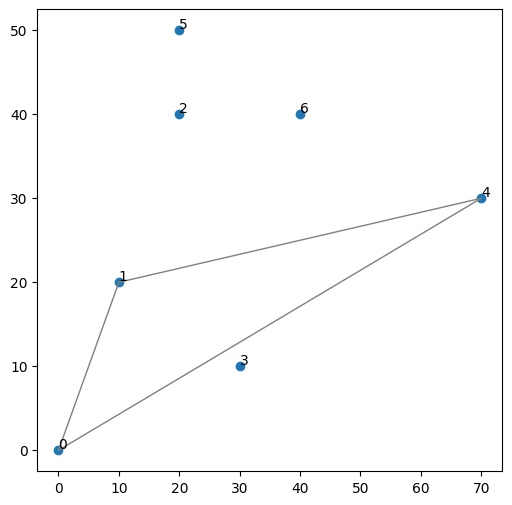

reg_matrix [[ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [44.72135955 12.52324961 19.55382363]
 [31.6227766   6.25441402  0.18640509]
 [ 0.          0.          0.        ]
 [63.1137449  24.64679937 31.54556508]
 [70.26337547  6.85066405 12.03358804]]
min_values_for_rows [ 0.          0.         12.52324961  0.18640509  0.         24.64679937
  6.85066405]
City with bigest regret 5
Rescueing edge index to modify:  1
real_rescueing_edge [1, 4] [(0, 1), [1, 4], [4, 0]]


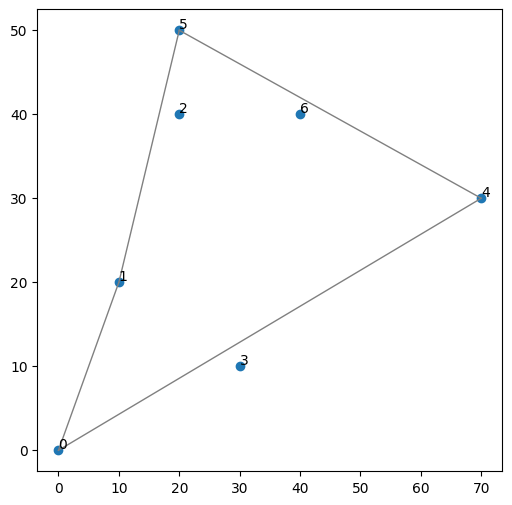

reg_matrix [[ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [44.72135955 19.55382363  0.73790317  7.13854706]
 [31.6227766   0.18640509 31.96895943 32.10076773]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [70.26337547 12.03358804 26.79341593  0.13180831]]
min_values_for_rows [0.         0.         0.73790317 0.18640509 0.         0.
 0.13180831]
City with bigest regret 2
Rescueing edge index to modify:  2
real_rescueing_edge [1, 5] [(0, 1), [4, 0], [1, 5], [5, 4]]


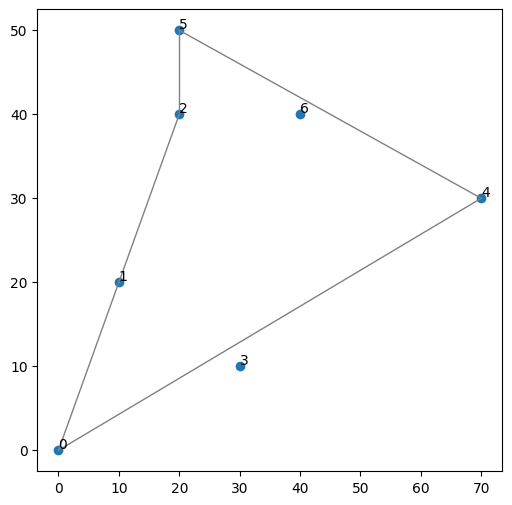

reg_matrix [[ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [31.6227766   0.18640509 32.10076773 31.6227766  62.85383286]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [70.26337547 12.03358804  0.13180831 33.69483298 32.36067977]]
min_values_for_rows [0.         0.         0.         0.18640509 0.         0.
 0.13180831]
City with bigest regret 3
Rescueing edge index to modify:  1
real_rescueing_edge [4, 0] [(0, 1), [4, 0], [5, 4], [1, 2], [2, 5]]


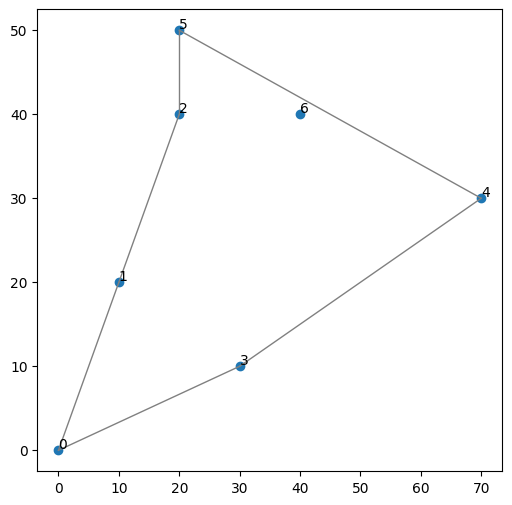

In [164]:
# cur_tour = [(4,3), (3,4)]
# non_visited = [0,1,2]

cur_tour = [(0,1),(1,0)]
non_visited = list(x for x in range(NR_NODES))
print(non_visited)
non_visited.remove(cur_tour[0][0])
non_visited.remove(cur_tour[0][1])
# regret_matrix = create_regret_matrix(non_visited, cur_tour, matrix)
# print(return_biggest_regret(regret_matrix)[0:2])
total_cost = 0
plotMap(data, edges=cur_tour, colors = False, cost = False)
for i in range(4):
    regret_matrix = create_regret_matrix(non_visited, cur_tour, matrix)
    rescue_node, rescueing_edge_index = return_biggest_regret(regret_matrix)
    print("real_rescueing_edge", cur_tour[rescueing_edge_index], cur_tour)
    cur_tour, cost_diff = add_to_cycle(cur_tour[rescueing_edge_index], rescue_node, matrix, cur_tour)
    total_cost += cost_diff
    non_visited.remove(rescue_node)
    plotMap(data, edges=cur_tour, colors = False, cost=False)